In [135]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

path = '' # use your path
files = glob.glob(os.path.join(path, "*.csv"))  

data_frames = []

for file in files:
    df = pd.read_csv(file)
    data_frames.append(df)
    
combined_df = pd.concat(data_frames, ignore_index=True)

In [136]:
clean_df = combined_df.dropna().reset_index(drop=True)
clean_df.head()

# unique_count = clean_df['genre'].nunique()
# unique_count #495 combinations in dataset

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt1825683,Black Panther,2018,PG-13,134 min,"Action, Adventure, Sci-Fi",7.3,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,/name/nm3363032/,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...","/name/nm1569276/,/name/nm0430107/,/name/nm2143...",785813.0,700059566.0
1,tt0092099,Top Gun,1986,PG,109 min,"Action, Drama",6.9,As students at the United States Navy's elite ...,Tony Scott,/name/nm0001716/,"Tom Cruise, \nTim Robbins, \nKelly McGillis, \...","/name/nm0000129/,/name/nm0000209/,/name/nm0000...",461419.0,179800601.0
2,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,A paraplegic Marine dispatched to the moon Pan...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",1322694.0,760507625.0
3,tt1392170,The Hunger Games,2012,PG-13,142 min,"Action, Adventure, Sci-Fi",7.2,Katniss Everdeen voluntarily takes her younger...,Gary Ross,/name/nm0002657/,"Jennifer Lawrence, \nJosh Hutcherson, \nLiam H...","/name/nm2225369/,/name/nm1242688/,/name/nm2955...",927499.0,408010692.0
4,tt1160419,Dune,2021,PG-13,155 min,"Action, Adventure, Drama",8.0,A noble family becomes embroiled in a war for ...,Denis Villeneuve,/name/nm0898288/,"Timothée Chalamet, \nRebecca Ferguson, \nZenda...","/name/nm3154303/,/name/nm0272581/,/name/nm3918...",649342.0,108327830.0


In [137]:
new_df = clean_df.loc[:, ['year', 'certificate', 'runtime', 'genre', 'rating', 'votes', 'gross(in $)']]

def convert_runtime(string):
    runtime = float(string.split(' ')[0])
    return runtime

new_df['runtime'] = new_df['runtime'].apply(convert_runtime)
new_df.head()

,year,certificate,runtime,genre,rating,votes,gross(in $)
0,2018,PG-13,134.0,"Action, Adventure, Sci-Fi",7.3,785813.0,700059566.0
1,1986,PG,109.0,"Action, Drama",6.9,461419.0,179800601.0
2,2009,PG-13,162.0,"Action, Adventure, Fantasy",7.9,1322694.0,760507625.0
3,2012,PG-13,142.0,"Action, Adventure, Sci-Fi",7.2,927499.0,408010692.0
4,2021,PG-13,155.0,"Action, Adventure, Drama",8.0,649342.0,108327830.0


In [138]:
genre = new_df['genre'].str.get_dummies(sep=', ')
new_df = pd.concat([new_df, genre], axis=1)

new_df.head()
# new_df.shape (18709, 28)

,year,certificate,runtime,genre,rating,votes,gross(in $),Action,Adventure,Animation,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2018,PG-13,134.0,"Action, Adventure, Sci-Fi",7.3,785813.0,700059566.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1986,PG,109.0,"Action, Drama",6.9,461419.0,179800601.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,PG-13,162.0,"Action, Adventure, Fantasy",7.9,1322694.0,760507625.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,PG-13,142.0,"Action, Adventure, Sci-Fi",7.2,927499.0,408010692.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2021,PG-13,155.0,"Action, Adventure, Drama",8.0,649342.0,108327830.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# scale down gross earnings from dollars to millions of dollars
new_df['gross(in $)'] = new_df['gross(in $)']/1e6

In [140]:
# filter out all data points to only include movies with the G, PG, PG-13, R, and NC-17 ratings
new_df=new_df.loc[(new_df['certificate'] == 'R') | (new_df['certificate'] =='PG-13') | (new_df['certificate'] == 'PG') | (new_df['certificate'] == 'Not Rated') | (new_df['certificate'] =='X') | (new_df['certificate'] == 'NC-17')]

Earliest Year: 1997
Latest Year: 2022


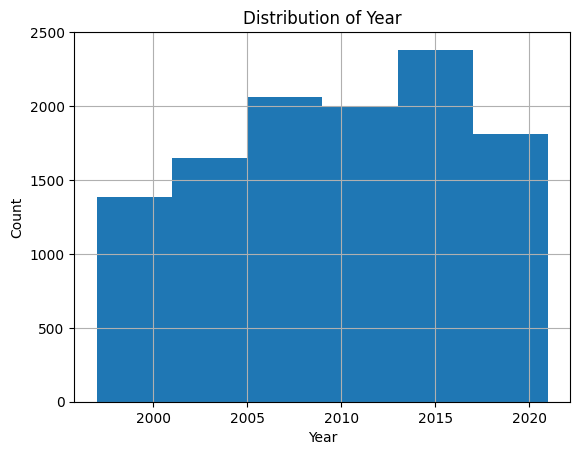

In [141]:
new_df['year'] = new_df['year'].astype(int)
new_df = new_df.loc[(new_df['year'] >= 1997)].reset_index(drop=True)

print('Earliest Year:', new_df['year'].min())
print('Latest Year:', new_df['year'].max())

new_df['year'].hist(bins=range(1997, 2022, 4))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

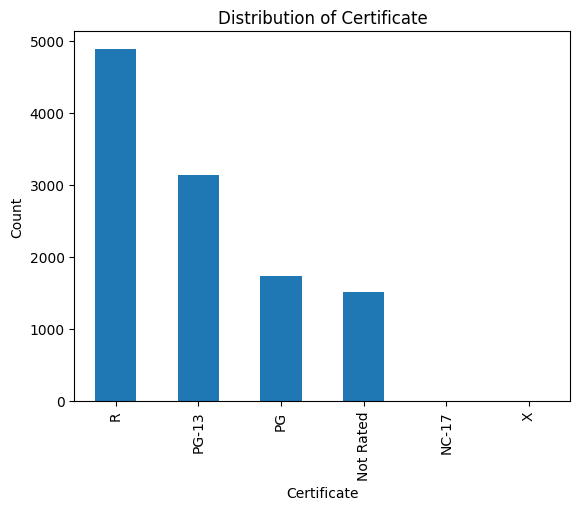

In [142]:
certificate_counts = new_df['certificate'].value_counts()
certificate_counts.plot.bar()
plt.title('Distribution of Certificate')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

Shortest Movie Runtime: 45.0 min
Longest Movie Runtime: 219.0 min
Average Movie Runtime: 108.23919206236711 min


Text(0, 0.5, 'Runtime')

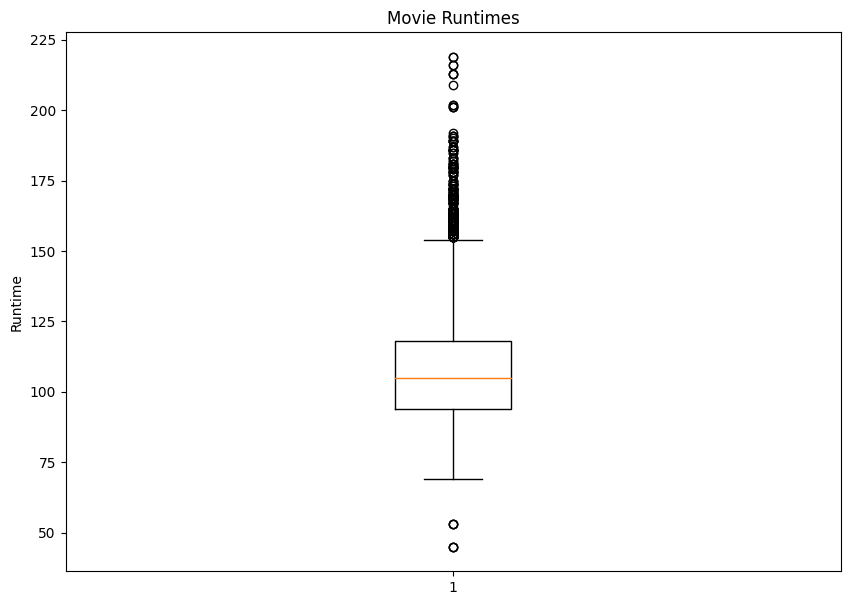

In [143]:
print('Shortest Movie Runtime:', new_df['runtime'].min(), 'min')
print('Longest Movie Runtime:', new_df['runtime'].max(), 'min')
print('Average Movie Runtime:', new_df['runtime'].mean(), 'min')
#Potential 2 Outliers (450min and 776min)

# new_df['runtime'].hist(bins=range(0, 800, 30))
# plt.xlabel('Minutes')
# plt.ylabel('Count')
# plt.title('Distribution of Runtime')
# plt.show()

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(new_df['runtime'])
ax.set_title('Movie Runtimes')
ax.set_ylabel('Runtime')

In [144]:
q3= new_df['runtime'].quantile(0.75)
q1= new_df['runtime'].quantile(0.25)
IQR=q3-q1
outliers_upper = new_df['runtime'].loc[new_df['runtime'] > q3 + 1.5 * IQR]
outliers_lower = new_df['runtime'].loc[new_df['runtime'] < q1 - 1.5 * IQR]
num_outliers_runtime = len(outliers_lower)+len(outliers_upper)
print("Number of outliers detected in runtime data: " + str(num_outliers_runtime))

Number of outliers detected in runtime data: 313


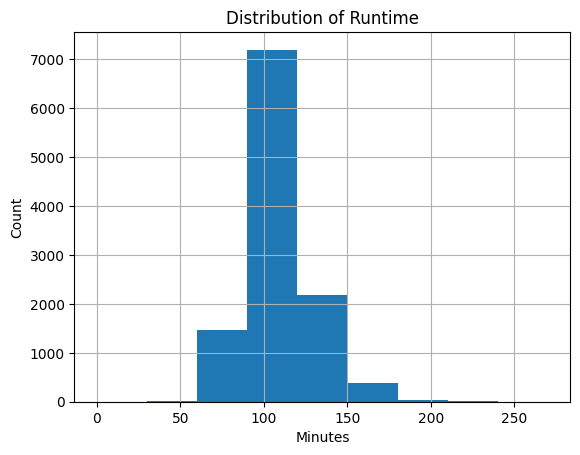

In [145]:
new_df = new_df[new_df['runtime'] < 300]
# new_df.shape
new_df['runtime'].hist(bins=range(0, 300, 30))
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Distribution of Runtime')
plt.show()

In [146]:
q3= new_df['rating'].quantile(0.75)
q1= new_df['rating'].quantile(0.25)
IQR=q3-q1
outliers_upper = new_df['rating'].loc[new_df['rating'] > q3 + 1.5 * IQR]
outliers_lower = new_df['rating'].loc[new_df['rating'] < q1 - 1.5 * IQR]
num_outliers_rating = len(outliers_lower)+len(outliers_upper)
print("Number of outliers detected in ratings data: " + str(num_outliers_rating))

Number of outliers detected in ratings data: 273


Text(0, 0.5, 'Year')

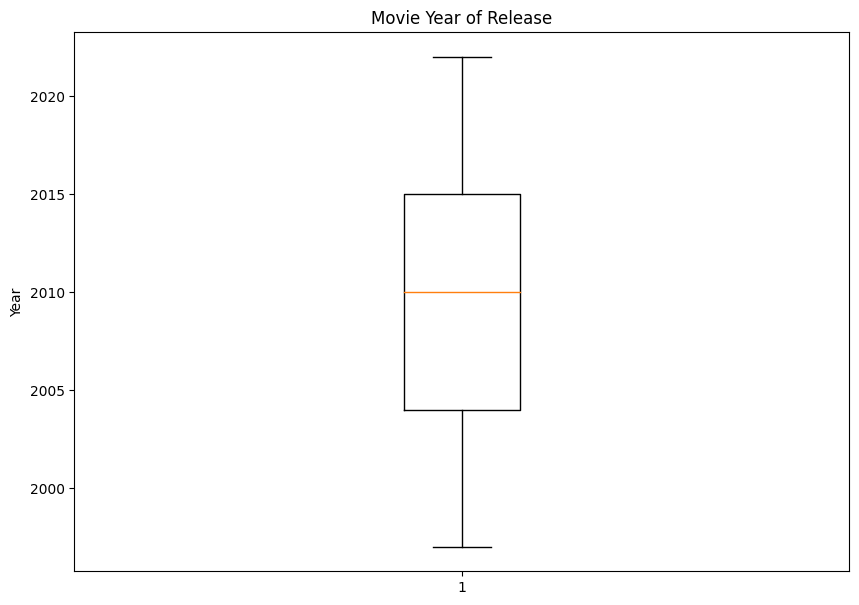

In [147]:

#print(years)
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
# Creating plot
plt.boxplot(new_df['year'])
# show plot
ax.set_title('Movie Year of Release')
#ax.set_xlabel('xlabel')
ax.set_ylabel('Year')

In [148]:
new_df['year'] = new_df['year'].astype(int)
q3= new_df['year'].quantile(0.75)
q1= new_df['year'].quantile(0.25)
IQR=q3-q1
outliers_upper = new_df['year'].loc[new_df['year'] > q3 + 1.5 * IQR]
outliers_lower = new_df['year'].loc[new_df['year'] < q1 - 1.5 * IQR]
num_outliers_year = len(outliers_lower)+len(outliers_upper)
print("Number of outliers detected in year data: " + str(num_outliers_year))

Number of outliers detected in year data: 0


Text(0, 0.5, 'Rating')

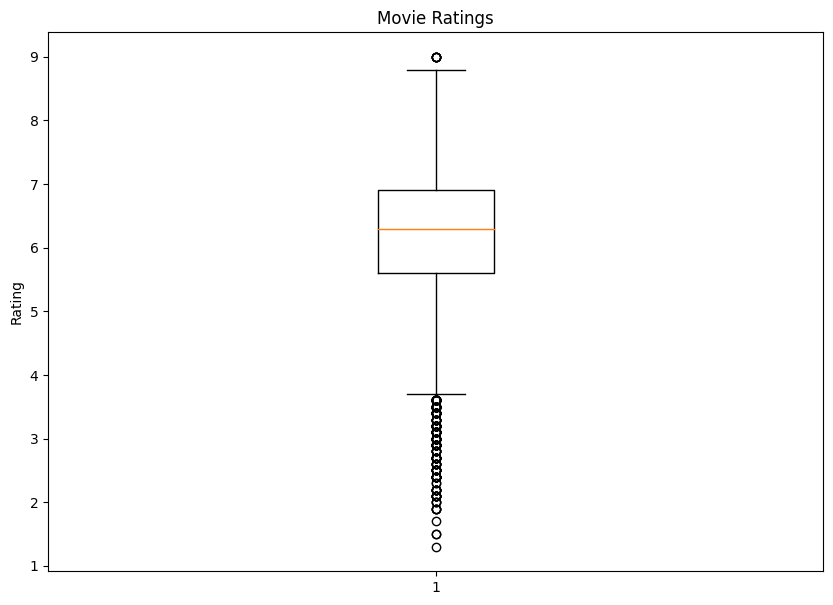

In [149]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(new_df['rating'])
ax.set_title('Movie Ratings')
ax.set_ylabel('Rating')

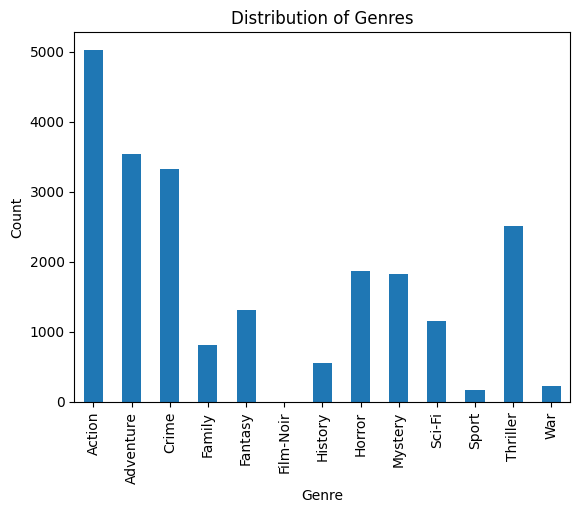

In [150]:
genre_counts = new_df.loc[:, ['Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.show()

<AxesSubplot: >

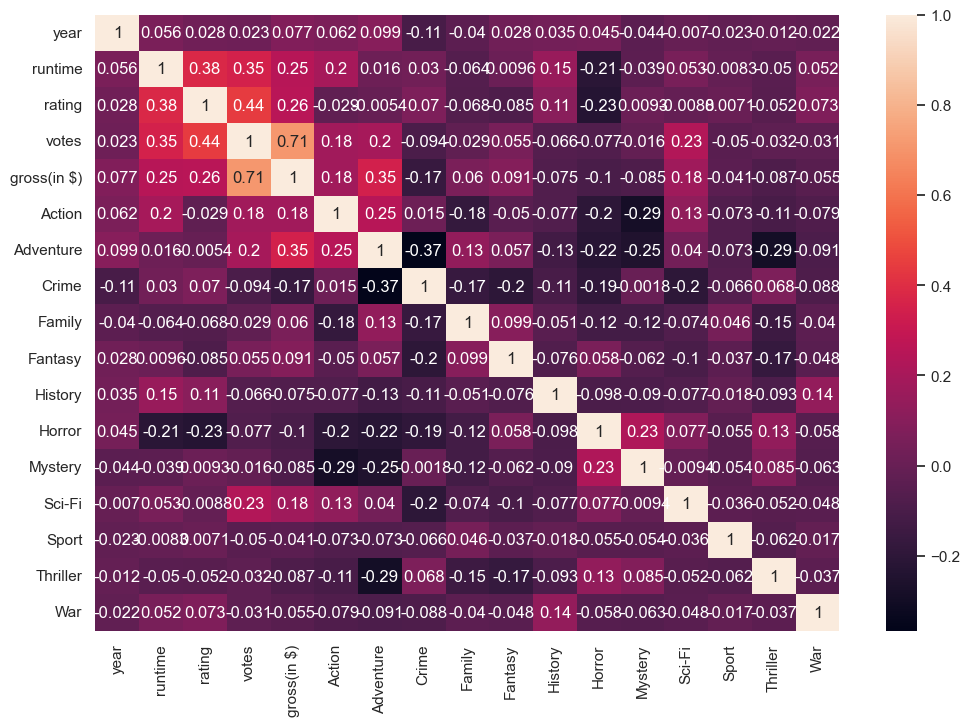

In [194]:
import seaborn as sns
# Correlation Matrix, dropping Film-Noir since none are in our dataframe anymore from the last 25 years
feature_df = new_df.drop(columns=['Animation', 'Biography', 'Comedy', 'Drama', 'Music', 'Musical', 'Romance', 'Western', 'Film-Noir'])
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(feature_df.corr(), annot=True)


<font size="8">Using 'Year' as Numerical</font>


In [151]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['year', 'certificate', 'runtime', 'rating', 'votes',
                                                            'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                                                            'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
                                                    , new_df['gross(in $)'], test_size=0.2, random_state=42)

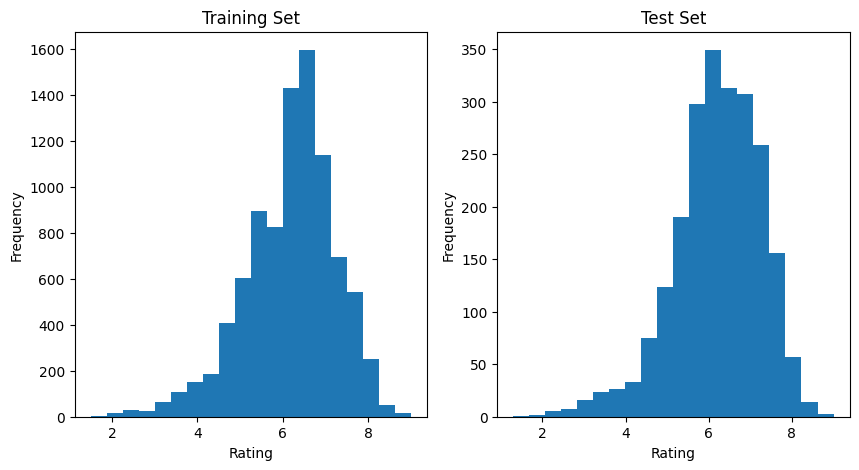

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

In [153]:
num_scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

In [154]:
X_train_num = X_train[['year', 'runtime', 'rating', 'votes',
                      'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                       'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_train_cat = X_train[['certificate']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [155]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=['year', 'runtime', 'rating', 'votes',
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))
], axis=1)

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [156]:
X_test_num = X_test[['year', 'runtime', 'rating', 'votes', 
                     'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                     'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_test_cat = X_test[['certificate']]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [157]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=['year', 'runtime', 'rating', 'votes', 
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 
                                             'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))
], axis=1)

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<font size="5">Linear Regression</font>

In [158]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['year', 'runtime', 'rating', 'votes', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.6080238517815499
Mean squared error: 2503.2700042250053
Mean absolute error: 27.472217905743165


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


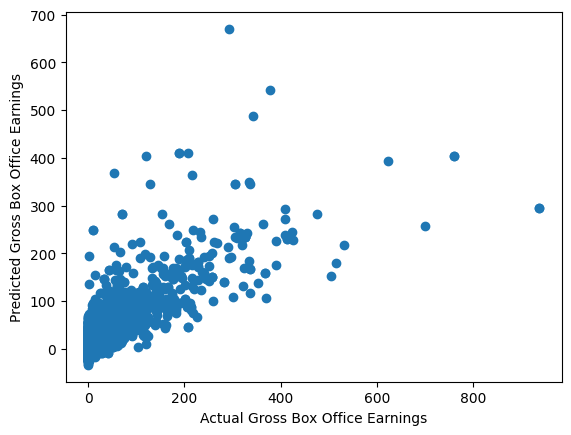

In [159]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

In [160]:
model = DecisionTreeRegressor()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.9560105777614265
Mean squared error: 280.9288312401104
Mean absolute error: 3.6422611922054924


<font size="8">Using Year as Categorical (5-year increment)</font>

In [161]:
new_df['year_category'] = (((new_df['year'] - 1910) // 5) * 5 + 1910) // 10 * 10
new_df['year_category'] = new_df['year_category'].apply(lambda x: str(x) + '-' + str(x+4) if (x+3) < 2023 else str(x) + '-2022')
new_df

,year,certificate,runtime,genre,rating,votes,gross(in $),Action,Adventure,Animation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,year_category
0,2018,PG-13,134.0,"Action, Adventure, Sci-Fi",7.3,785813.0,700.059566,1,1,0,...,0,0,0,0,1,0,0,0,0,2010-2014
1,2009,PG-13,162.0,"Action, Adventure, Fantasy",7.9,1322694.0,760.507625,1,1,0,...,0,0,0,0,0,0,0,0,0,2000-2004
2,2012,PG-13,142.0,"Action, Adventure, Sci-Fi",7.2,927499.0,408.010692,1,1,0,...,0,0,0,0,1,0,0,0,0,2010-2014
3,2021,PG-13,155.0,"Action, Adventure, Drama",8.0,649342.0,108.327830,1,1,0,...,0,0,0,0,0,0,0,0,0,2020-2022
4,2001,PG-13,178.0,"Action, Adventure, Drama",8.8,1889727.0,315.544750,1,1,0,...,0,0,0,0,0,0,0,0,0,2000-2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,1998,Not Rated,129.0,"Comedy, Drama, History",7.2,1573.0,0.071832,0,0,0,...,0,0,0,0,0,0,0,0,0,1990-1994
11284,2002,PG,109.0,"Comedy, War, Drama",6.6,924.0,0.151133,0,0,0,...,0,0,0,0,0,0,0,1,0,2000-2004
11285,2014,Not Rated,112.0,"Drama, History, War",5.9,156.0,0.024441,0,0,0,...,0,0,0,0,0,0,0,1,0,2010-2014
11286,2007,Not Rated,143.0,"Drama, History, Music",6.1,1221.0,0.005309,0,0,0,...,1,0,0,0,0,0,0,0,0,2000-2004


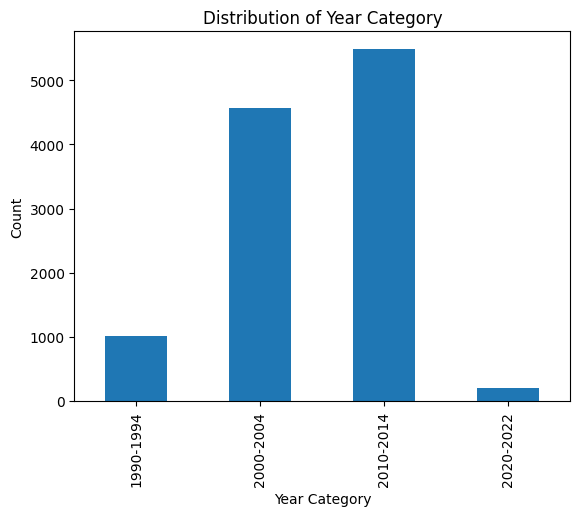

In [162]:
year_counts = new_df['year_category'].value_counts().sort_index()
year_counts.plot.bar()
plt.title('Distribution of Year Category')
plt.xlabel('Year Category')
plt.ylabel('Count')
plt.show()

In [163]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['certificate', 'runtime', 'rating', 'votes', 'year_category',
                                                            'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                                                            'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
                                                    , new_df['gross(in $)'], test_size=0.2, random_state=42)

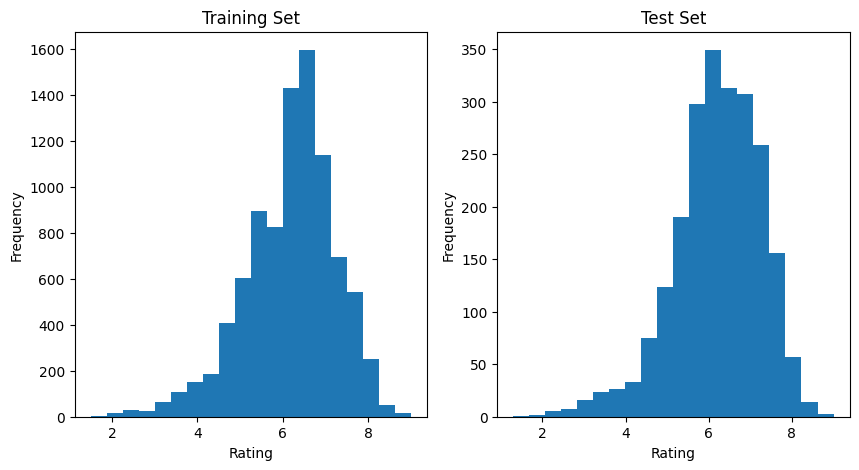

In [164]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

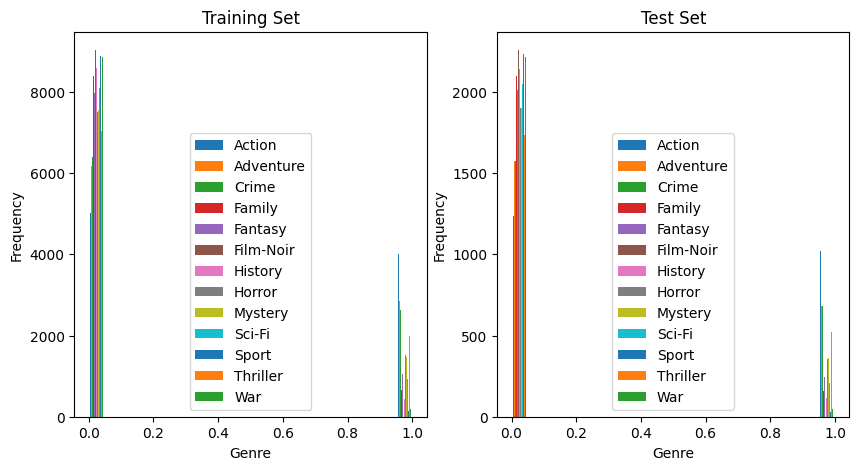

In [177]:
# Distribution of Genres
# Extract the genre columns from the train and test sets
genre_cols = ['Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']
X_train_genre = X_train[genre_cols]
X_test_genre = X_test[genre_cols]

# Plot the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train_genre.values, bins=20, label=genre_cols)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Frequency')
ax[0].legend()
ax[1].hist(X_test_genre.values, bins=20, label=genre_cols)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Frequency')
ax[1].legend()
plt.show()

In [165]:
X_train_num = X_train[['runtime', 'rating', 'votes', 
                      'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                       'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_train_cat = X_train[['certificate', 'year_category']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [166]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=['runtime', 'rating', 'votes',
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate','year_category']))
], axis=1)

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [167]:
X_test_num = X_test[['runtime', 'rating', 'votes', 
                     'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                     'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_test_cat = X_test[['certificate', 'year_category',]]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [168]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 
                                             'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))
], axis=1)

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<font size="5">Linear Regression</font>

In [169]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.6087595076589145
Mean squared error: 2498.5718987417795
Mean absolute error: 27.27076505943517


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


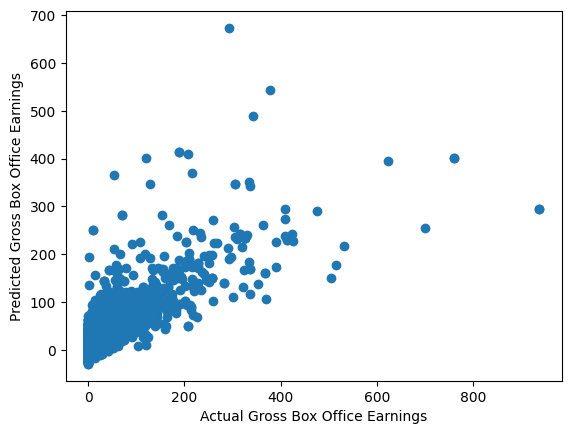

In [170]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


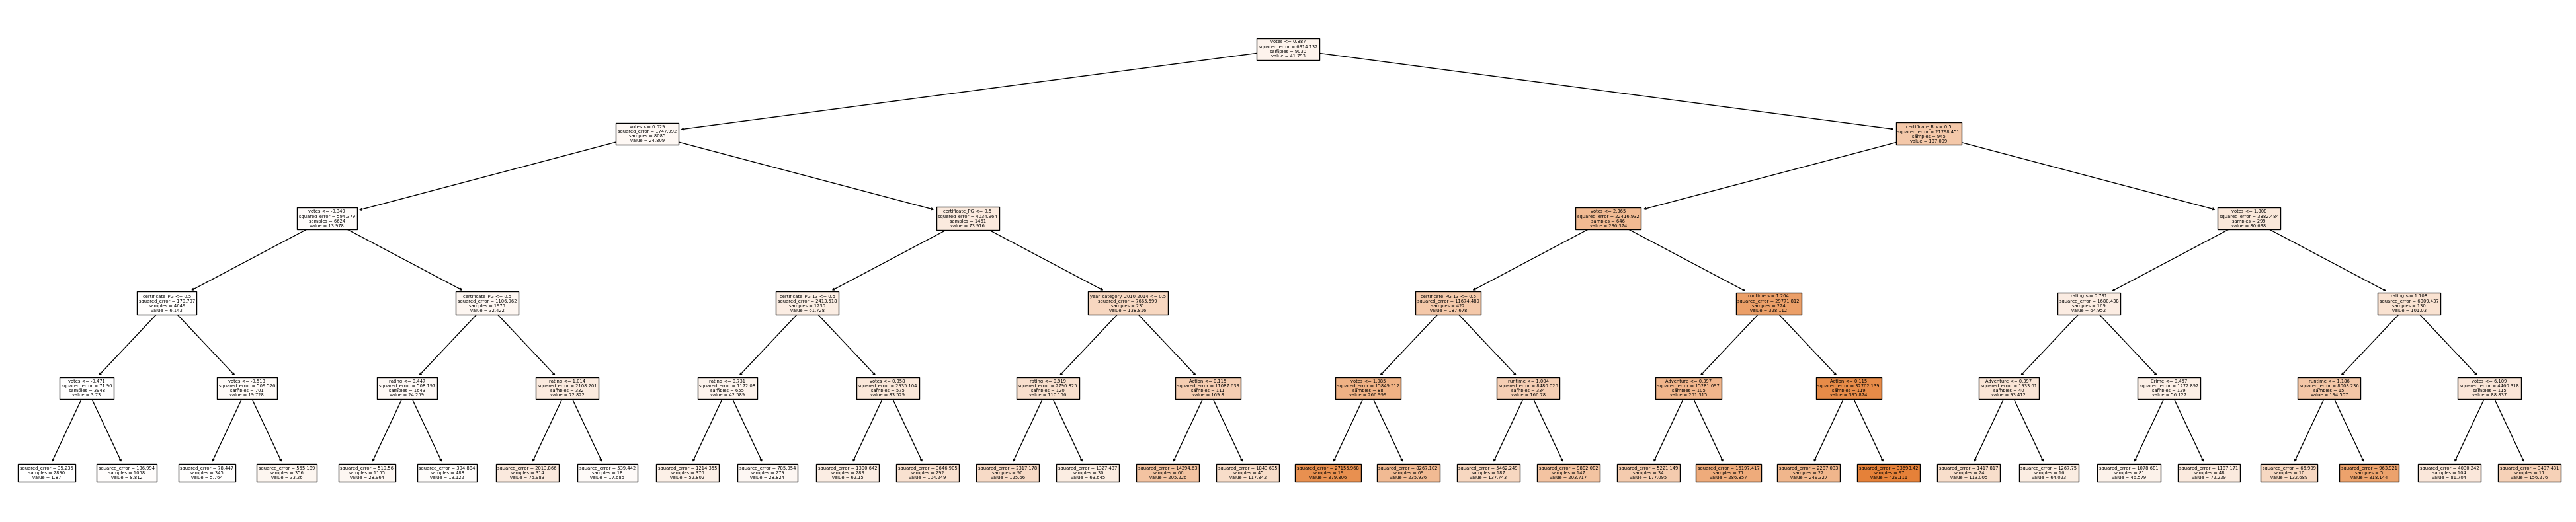

R2 score: 0.7210476009102073
Mean squared error: 1781.4685317508627
Mean absolute error: 20.549637158689634


In [171]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train_preprocessed, y_train)
y_pred= model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

feature_names = X_train_preprocessed.columns
plt.figure(figsize=(50, 10))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

<font size="5">SVR</font>

In [172]:
model = SVR(kernel='rbf', C=100, gamma='auto')
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


R2 score: 0.7697685009767279
Mean squared error: 1470.3231514268655
Mean absolute error: 16.75252056379703


<font size="5">Random Forest</font>

In [196]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_preprocessed, y_train)

y_pred = rf.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))
mse = mean_squared_error(y_test, y_pred)
print(mse)

548.1535363454695


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<font size="5">XGBoost</font>

In [174]:
model = xgb.XGBRegressor()
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Root Mean Squared Error:  16.613568698251814


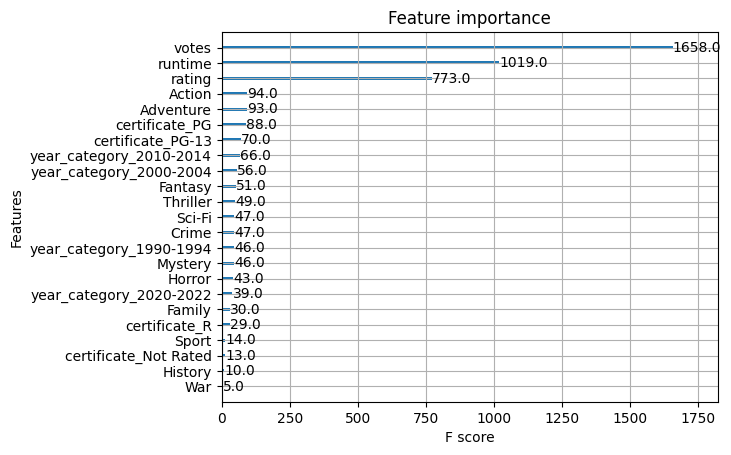

In [175]:
xgb.plot_importance(model)
plt.show()

<font size="5">XGBoost</font>